In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df=pd.read_csv('/content/data.csv',encoding='unicode_escape')

In [10]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [11]:
df.shape

(21513, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21513 entries, 0 to 21512
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     12441 non-null  float64
 1   sampling_date                21513 non-null  object 
 2   state                        21513 non-null  object 
 3   location                     21513 non-null  object 
 4   agency                       12015 non-null  object 
 5   type                         20902 non-null  object 
 6   so2                          20976 non-null  float64
 7   no2                          21112 non-null  float64
 8   rspm                         20372 non-null  float64
 9   spm                          11789 non-null  float64
 10  location_monitoring_station  20476 non-null  object 
 11  pm2_5                        0 non-null      float64
 12  date                         21512 non-null  object 
dtypes: float64(6), o

We can see so many null values are present in some columns

In [13]:
df.isnull().sum()
#there are alot of null values present in dataset

stn_code                        9072
sampling_date                      0
state                              0
location                           0
agency                          9498
type                             611
so2                              537
no2                              401
rspm                            1141
spm                             9724
location_monitoring_station     1037
pm2_5                          21513
date                               1
dtype: int64

In [14]:
df.describe()

,stn_code,so2,no2,rspm,spm,pm2_5
count,12441.000000,20976.000000,21112.000000,20372.000000,11789.000000,0.0
mean,430.090025,7.178304,22.099697,79.188999,200.260378,NaN
std,187.203952,6.913635,12.576709,36.526545,86.085966,NaN
min,95.000000,0.900000,2.600000,3.000000,8.000000,NaN
25%,234.000000,4.000000,12.200000,54.000000,139.000000,NaN
50%,462.000000,5.000000,20.000000,76.000000,184.000000,NaN
75%,580.000000,8.000000,30.000000,98.000000,252.000000,NaN
max,758.000000,228.000000,334.900000,538.000000,1082.000000,NaN


In [15]:
df.nunique()
#these are all the unique values present in dataFrame

stn_code                         50
sampling_date                  3366
state                             1
location                         25
agency                            4
type                              6
so2                             416
no2                             720
rspm                            497
spm                             725
location_monitoring_station      74
pm2_5                             0
date                           3364
dtype: int64

In [16]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

Here stn_code is Station code
sampling_data is data for sample collection
state=indian state
location= location of sample collection
agency type= type of area
so2=sulphur dioxide concentration
no2=nitrogen dioxide concentration
rspm=respirable suspended particulate matter concentration
spm = suspended particulate matter
location_monitoring_station,pm2_5= particulate matter 2.5
date=date

# Data Visualization

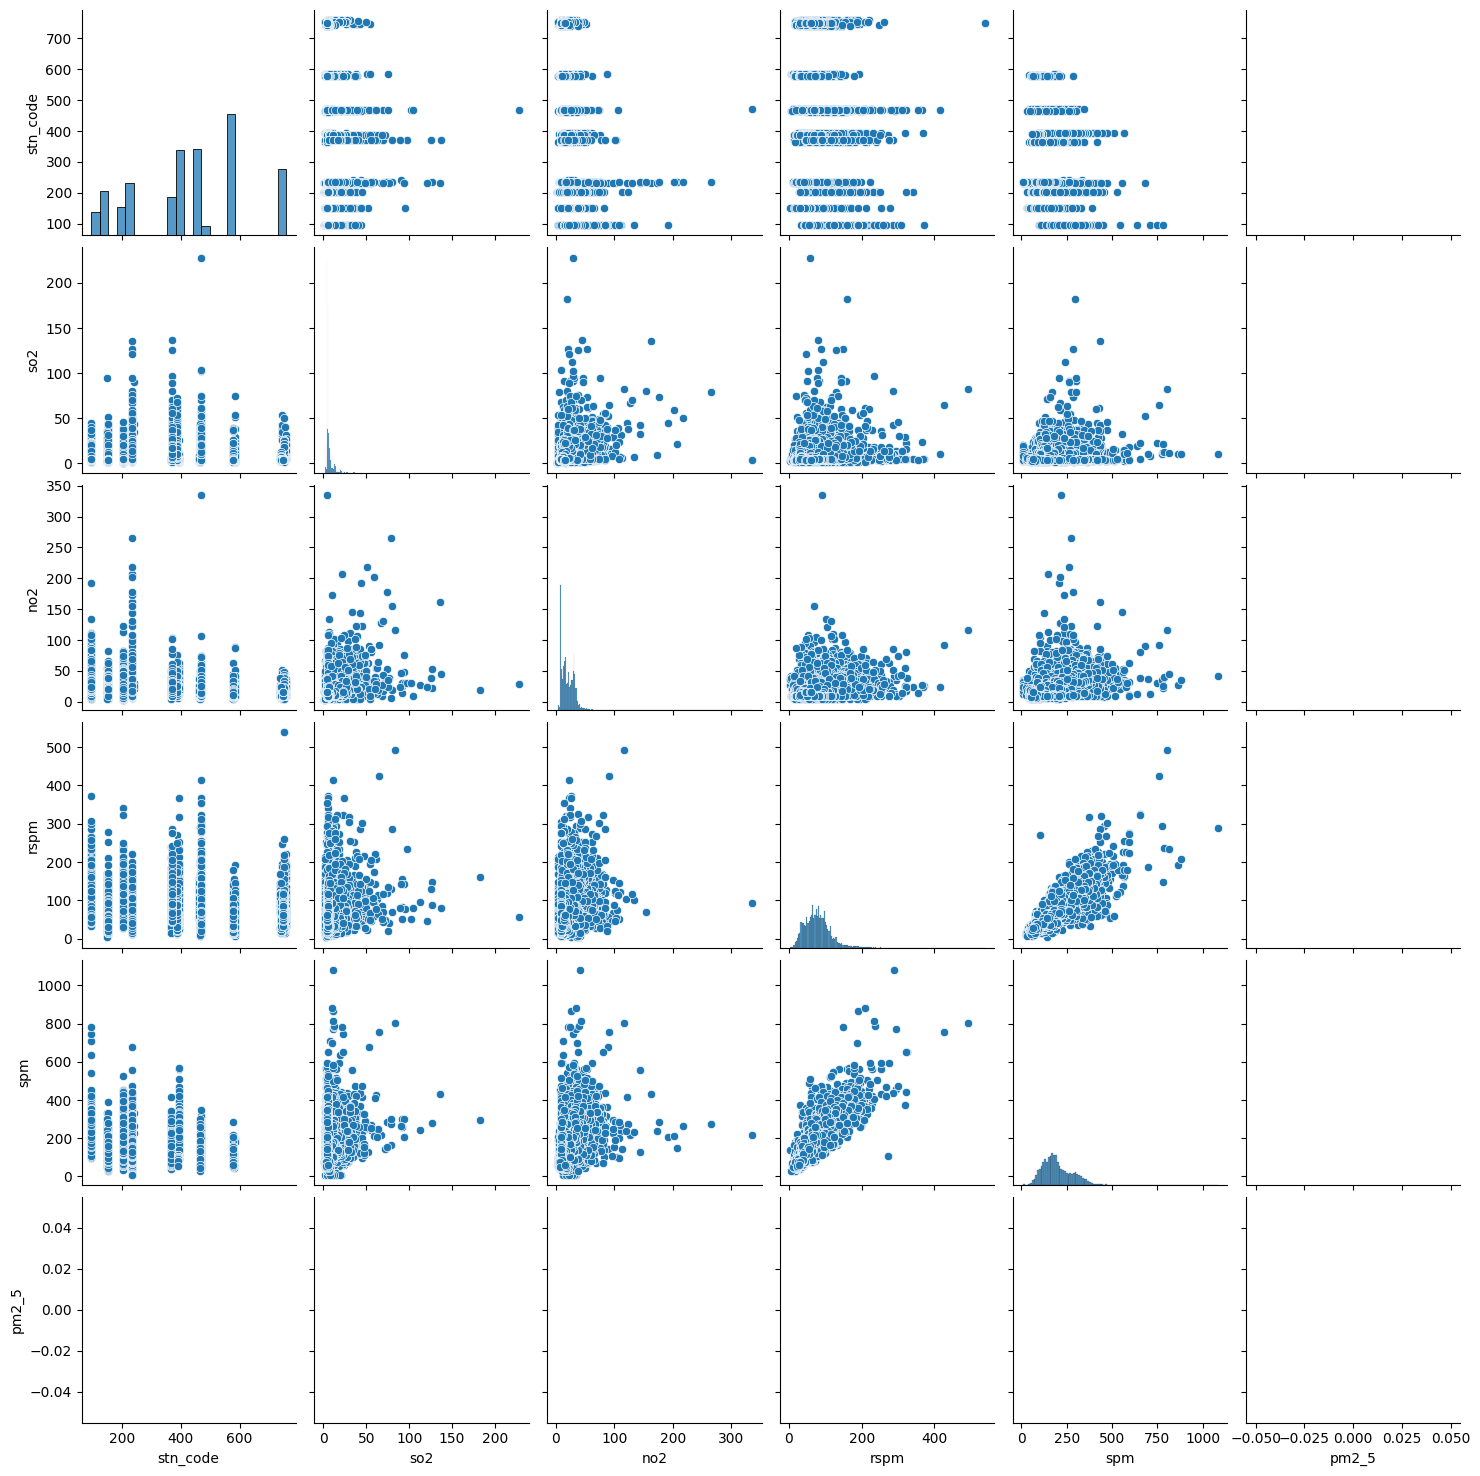

In [17]:
sns.pairplot(data=df)

In [18]:
df['state'].value_counts()
#viewing count of values present in the state column

Andhra Pradesh    21513
Name: state, dtype: int64

[]

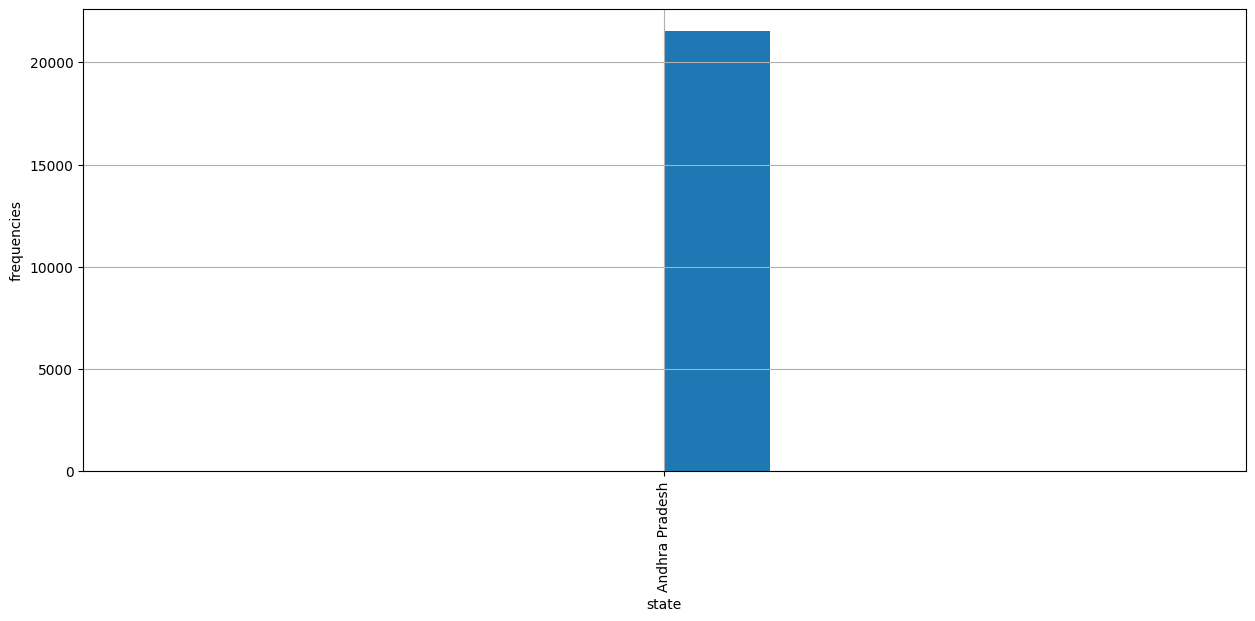

In [19]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('frequencies')
plt.plot()
#the visualization shows us the count of states present in the dataset

In [20]:
df['type'].value_counts()

Residential, Rural and other Areas    7509
Residential and others                5515
Industrial Area                       2864
Industrial Areas                      2275
Sensitive Area                        1457
Sensitive Areas                       1282
Name: type, dtype: int64

[]

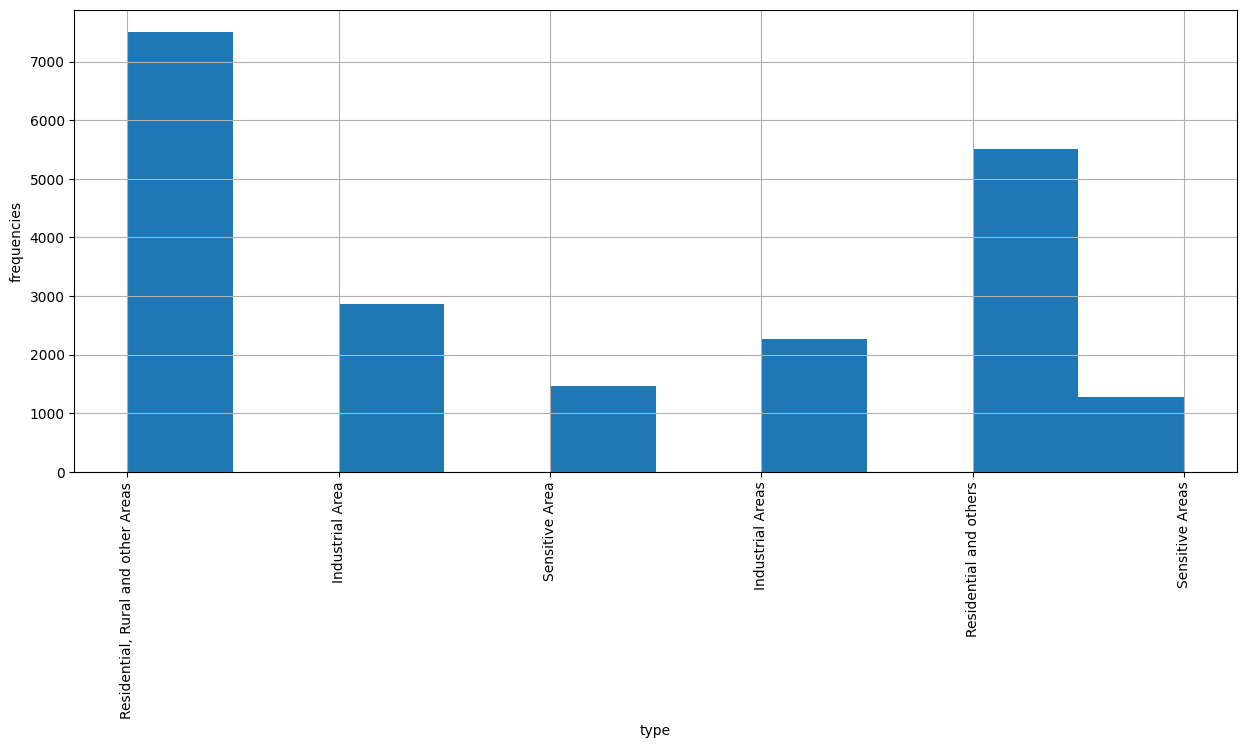

In [21]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('type')
plt.ylabel('frequencies')
plt.plot()
#the visualisation shows us the count of types in data

counts of residential areas are higher

In [22]:
df['agency'].value_counts()

Andhra Pradesh State Pollution Control Board             10835
Andhra Pradesh  Pollution Control Board                    610
National Environmental Engineering Research Institute      569
Andhra Pradesh State Pollution Control Bo                    1
Name: agency, dtype: int64

[]

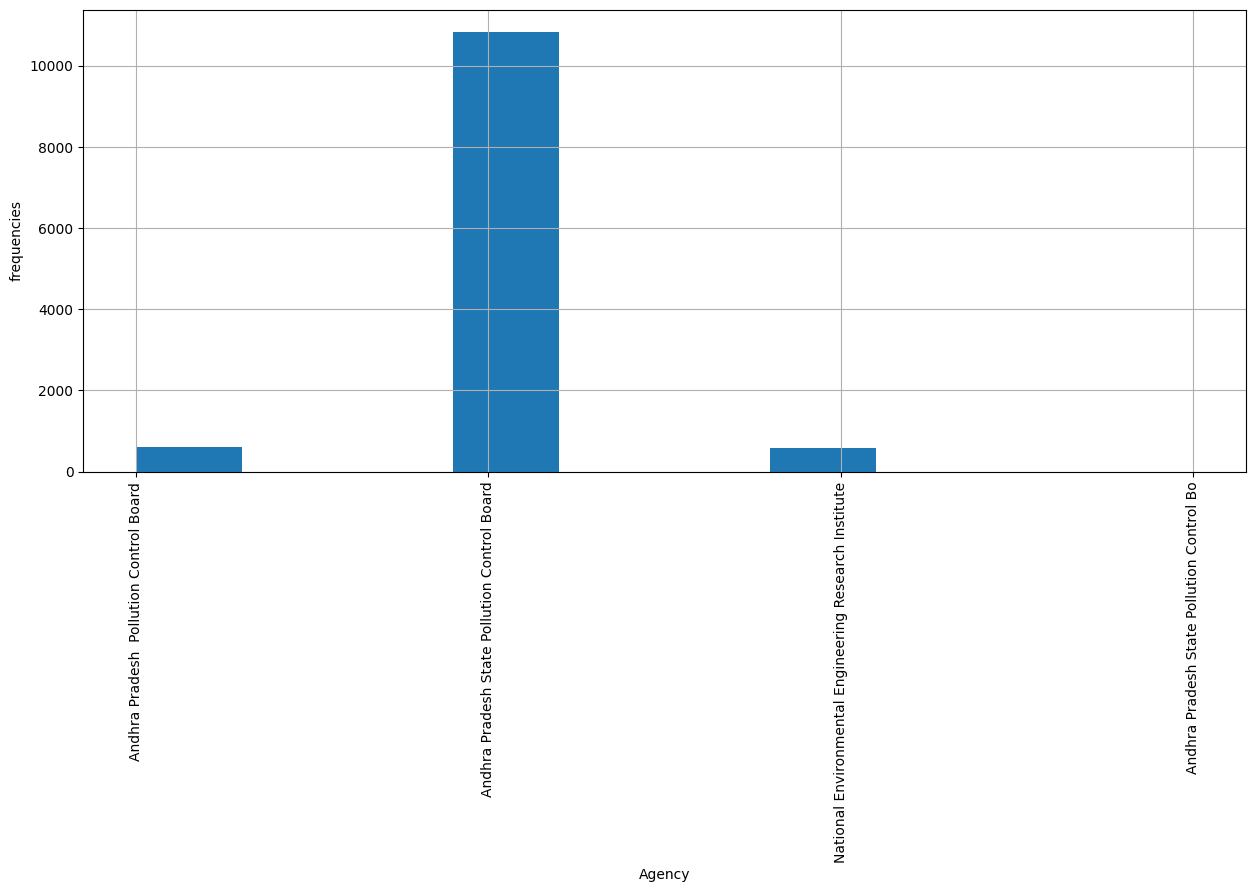

In [23]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('frequencies')
plt.plot()

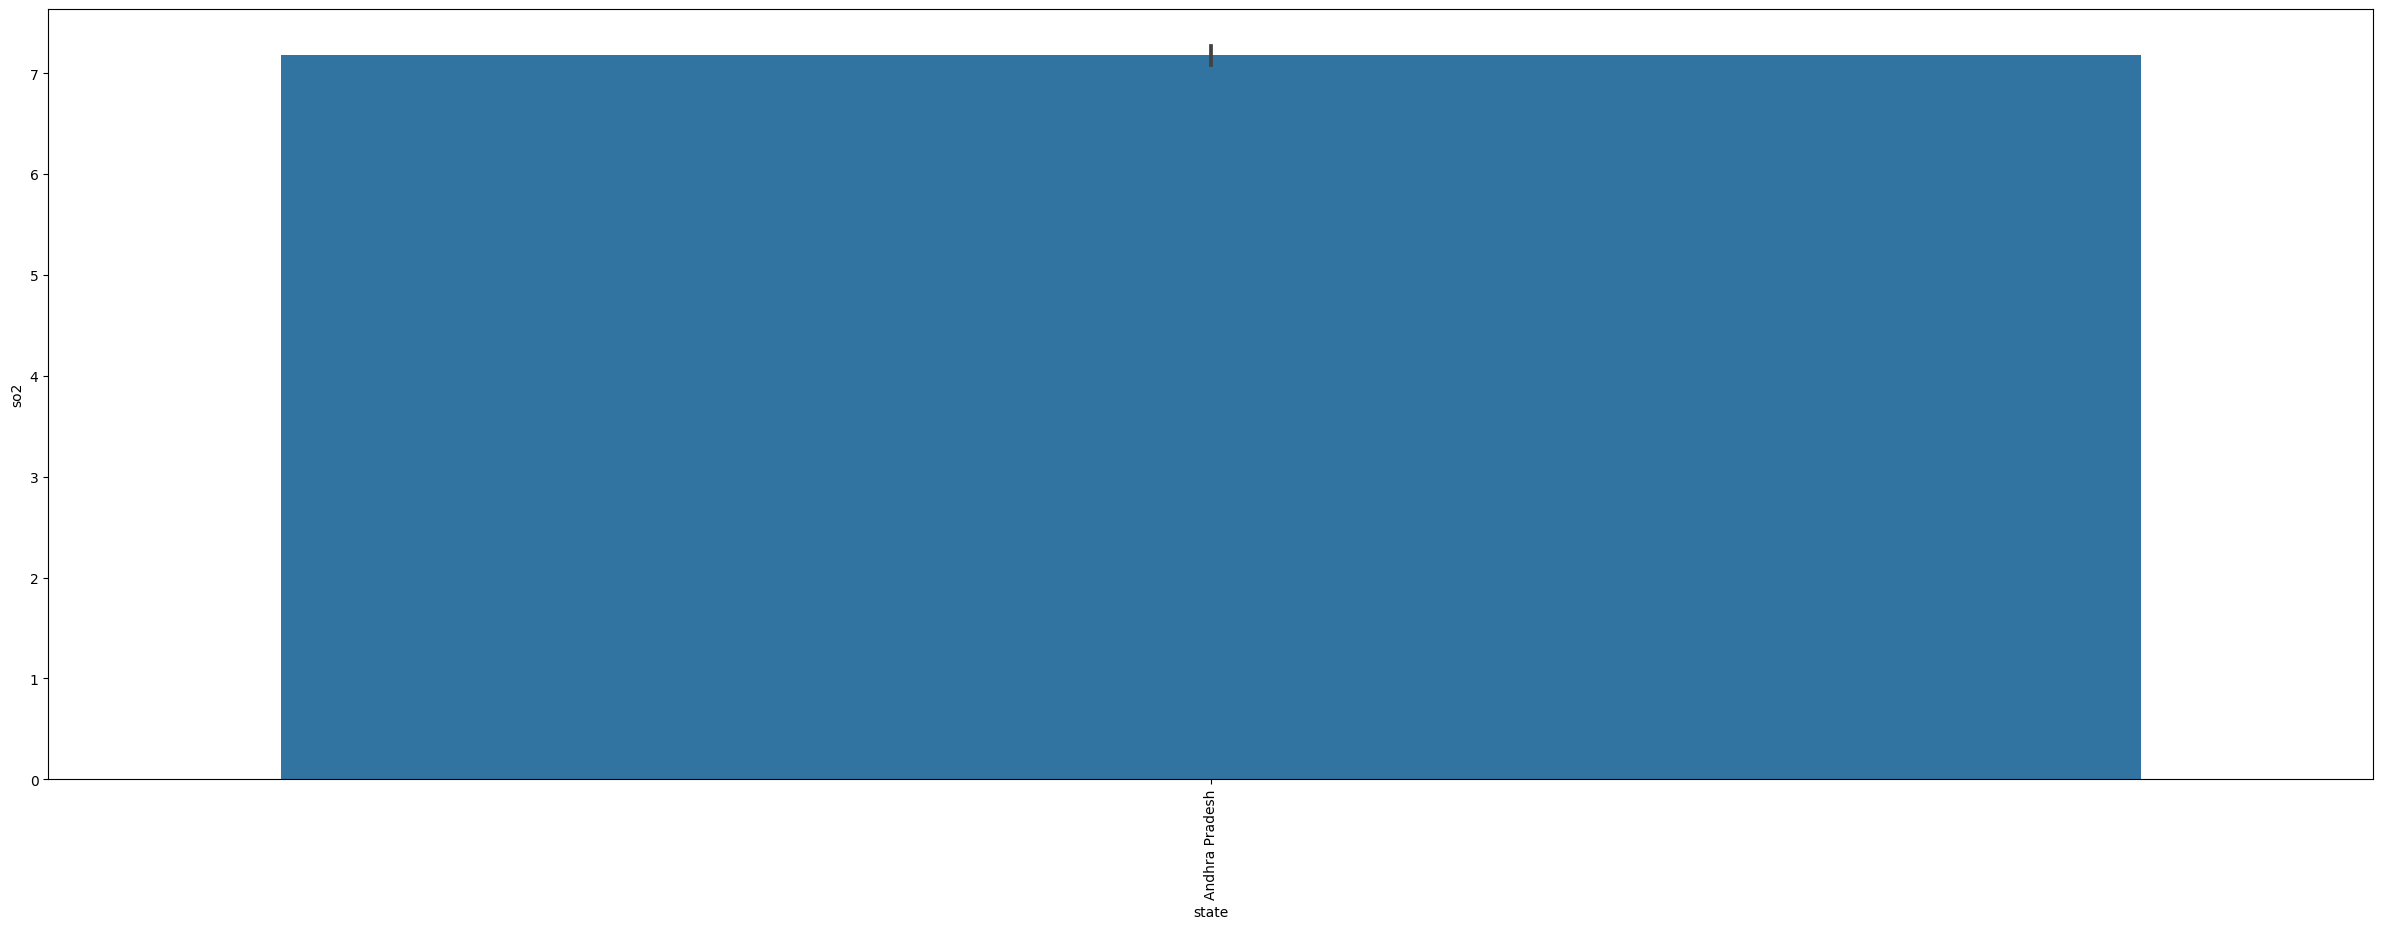

In [24]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);

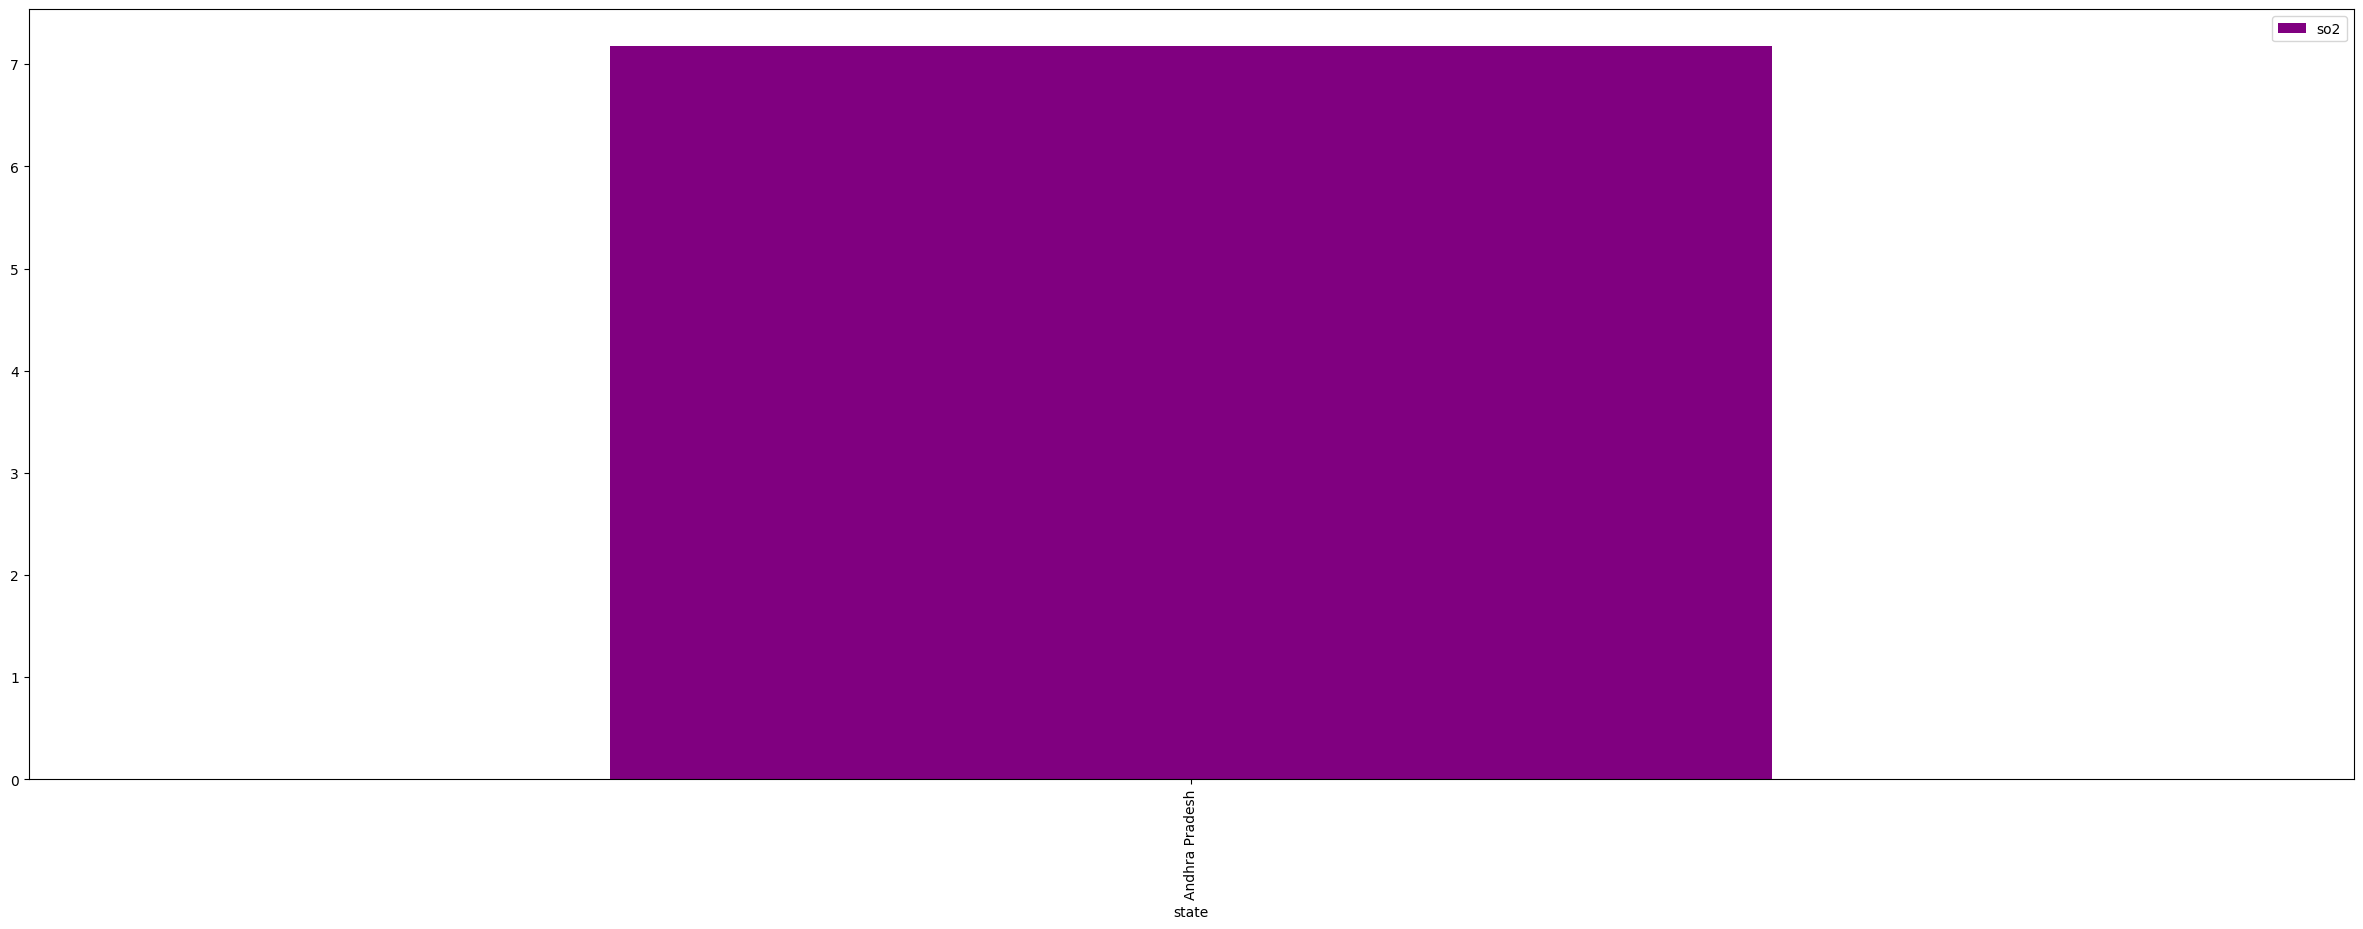

In [25]:
plt.rcParams['figure.figsize']=(30,10)
df[['so2','state']].groupby(['state']).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

Here we can see clearly which has highest sulphur dioxide in the air in increasing order

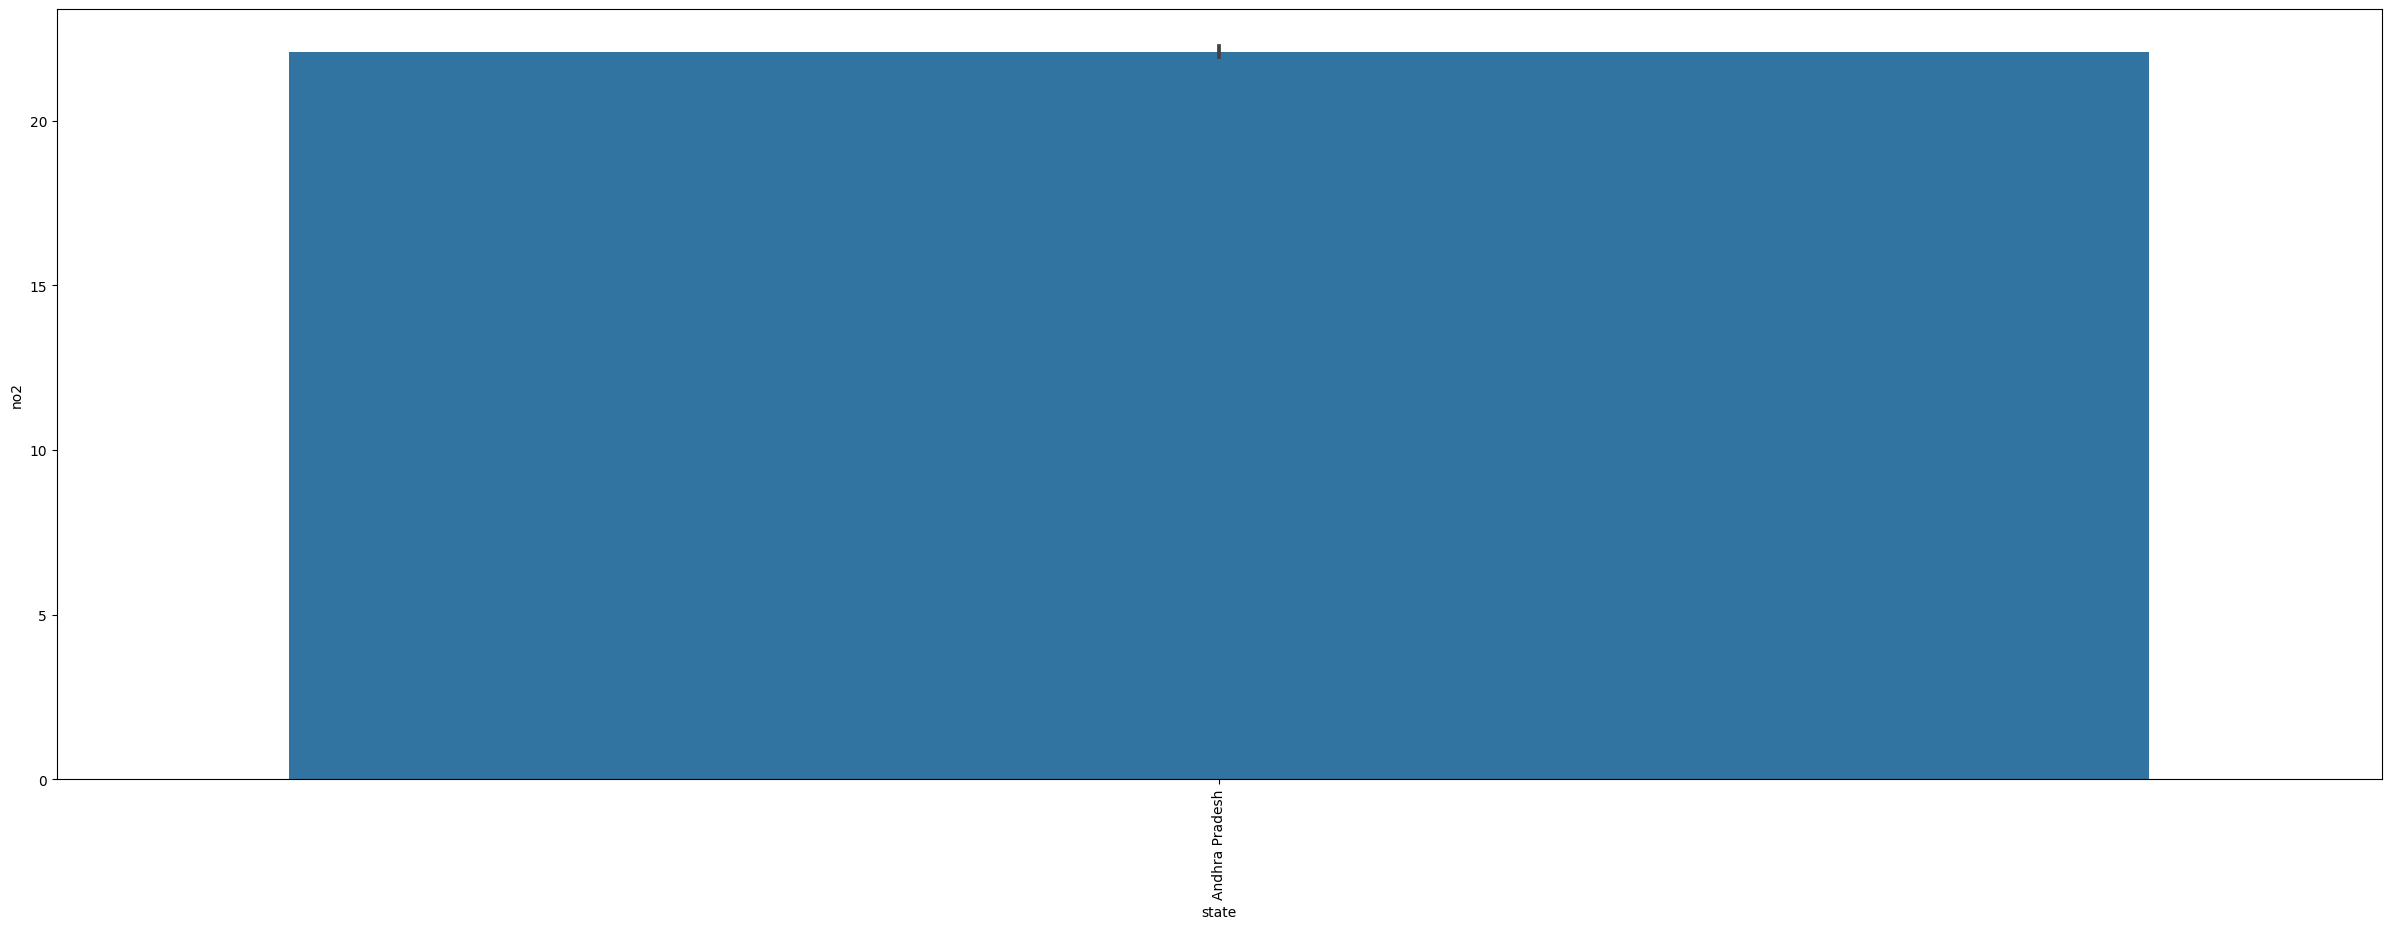

In [26]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);


We can see west bengal has highest level of no2 followed by Delhi

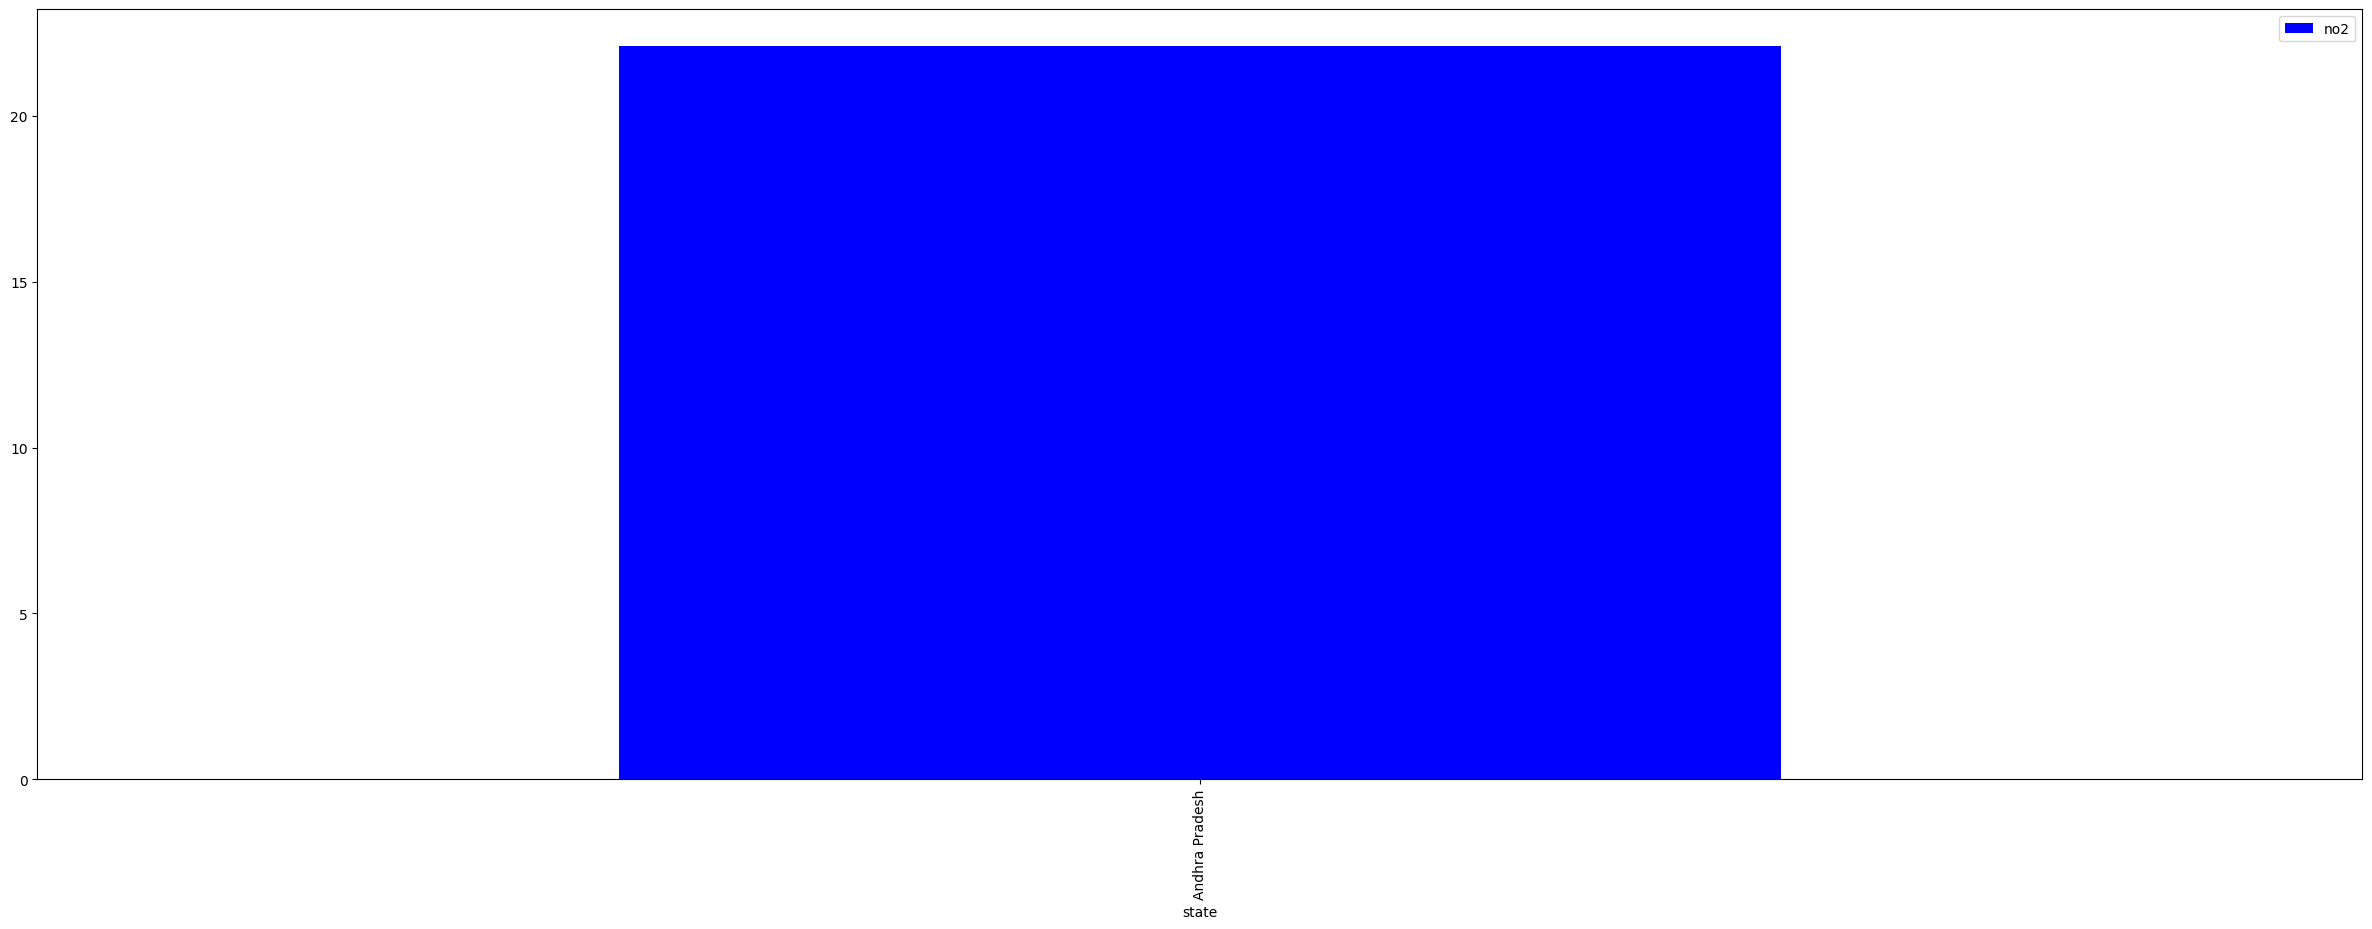

In [27]:
df[['no2','state']].groupby(['state']).mean().sort_values(by='no2').plot.bar(color='blue')
plt.show()

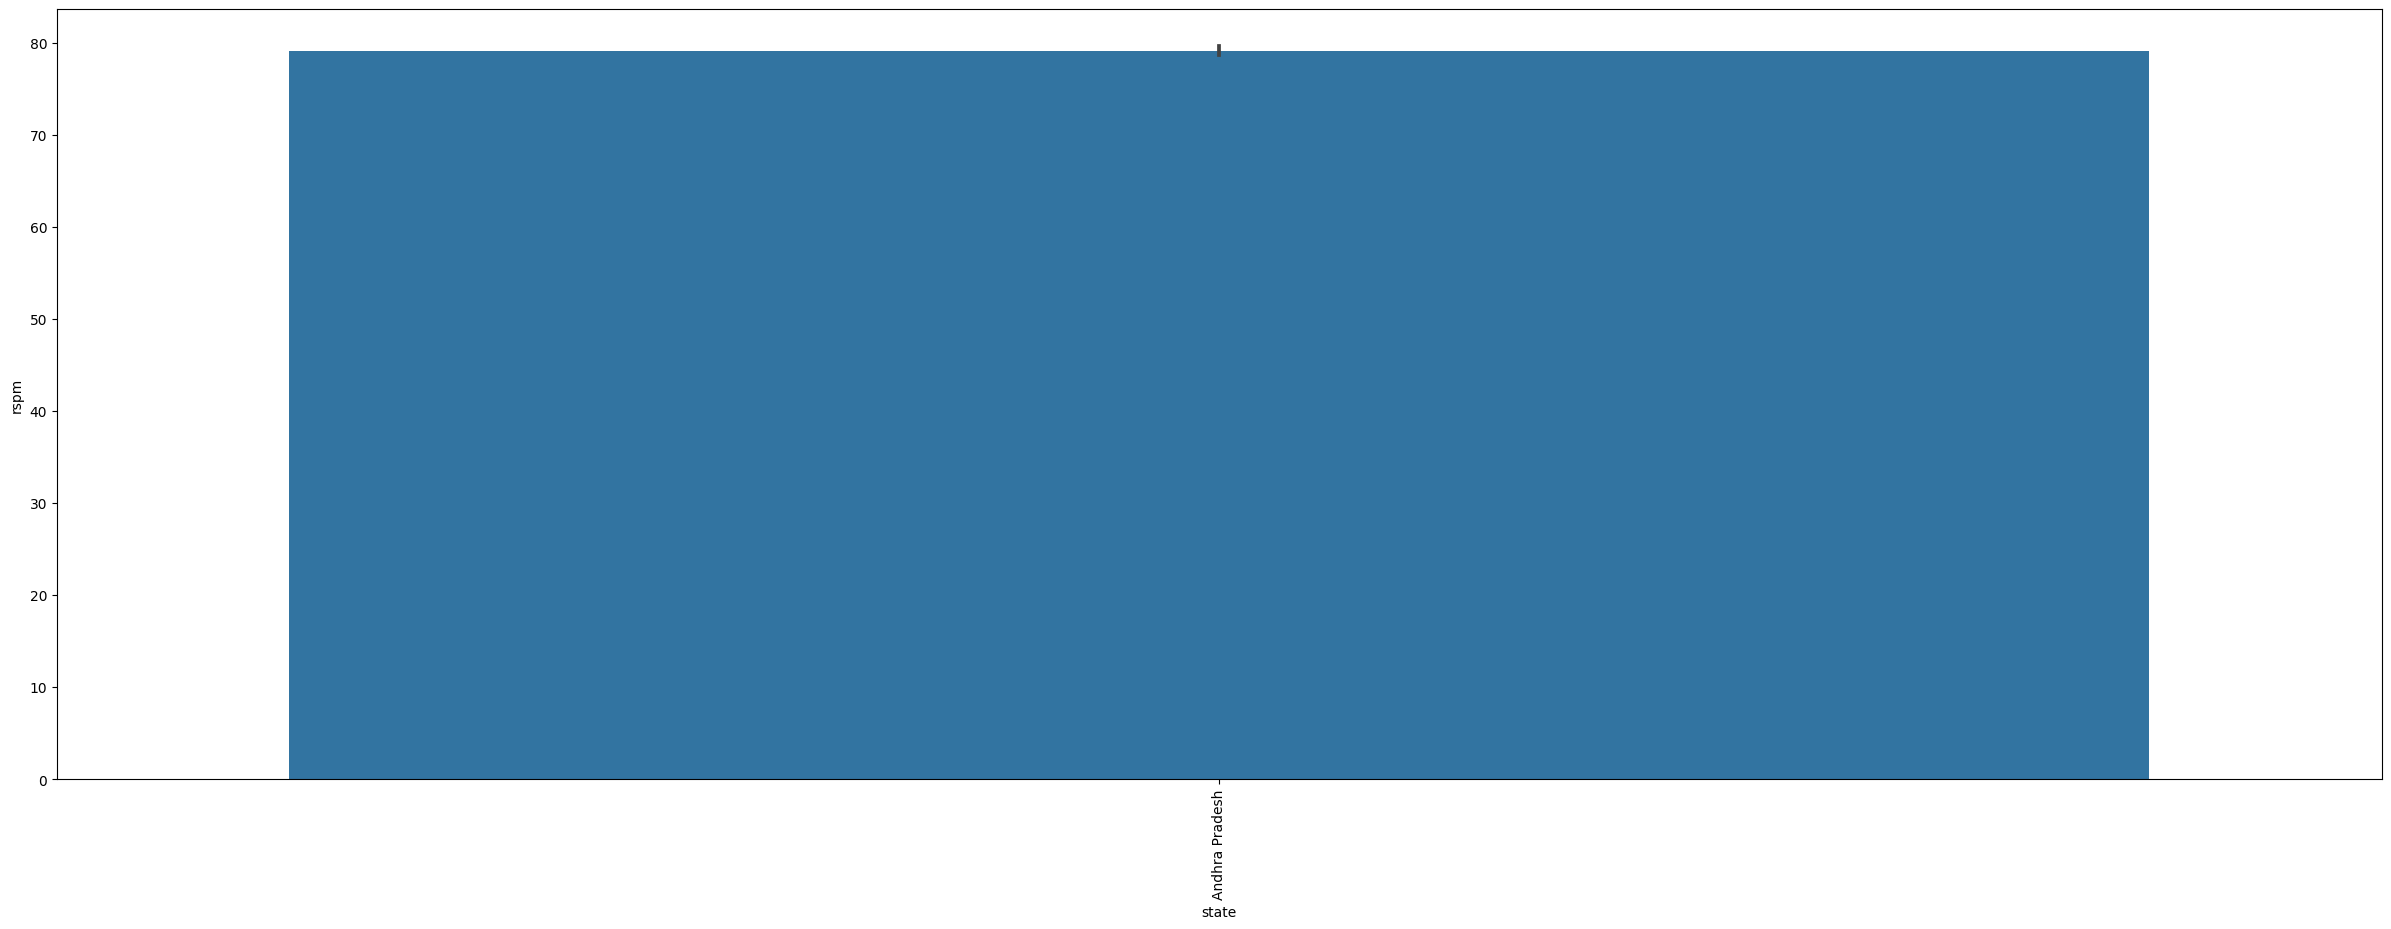

In [28]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
#delhi has higher rspm level compared to other states

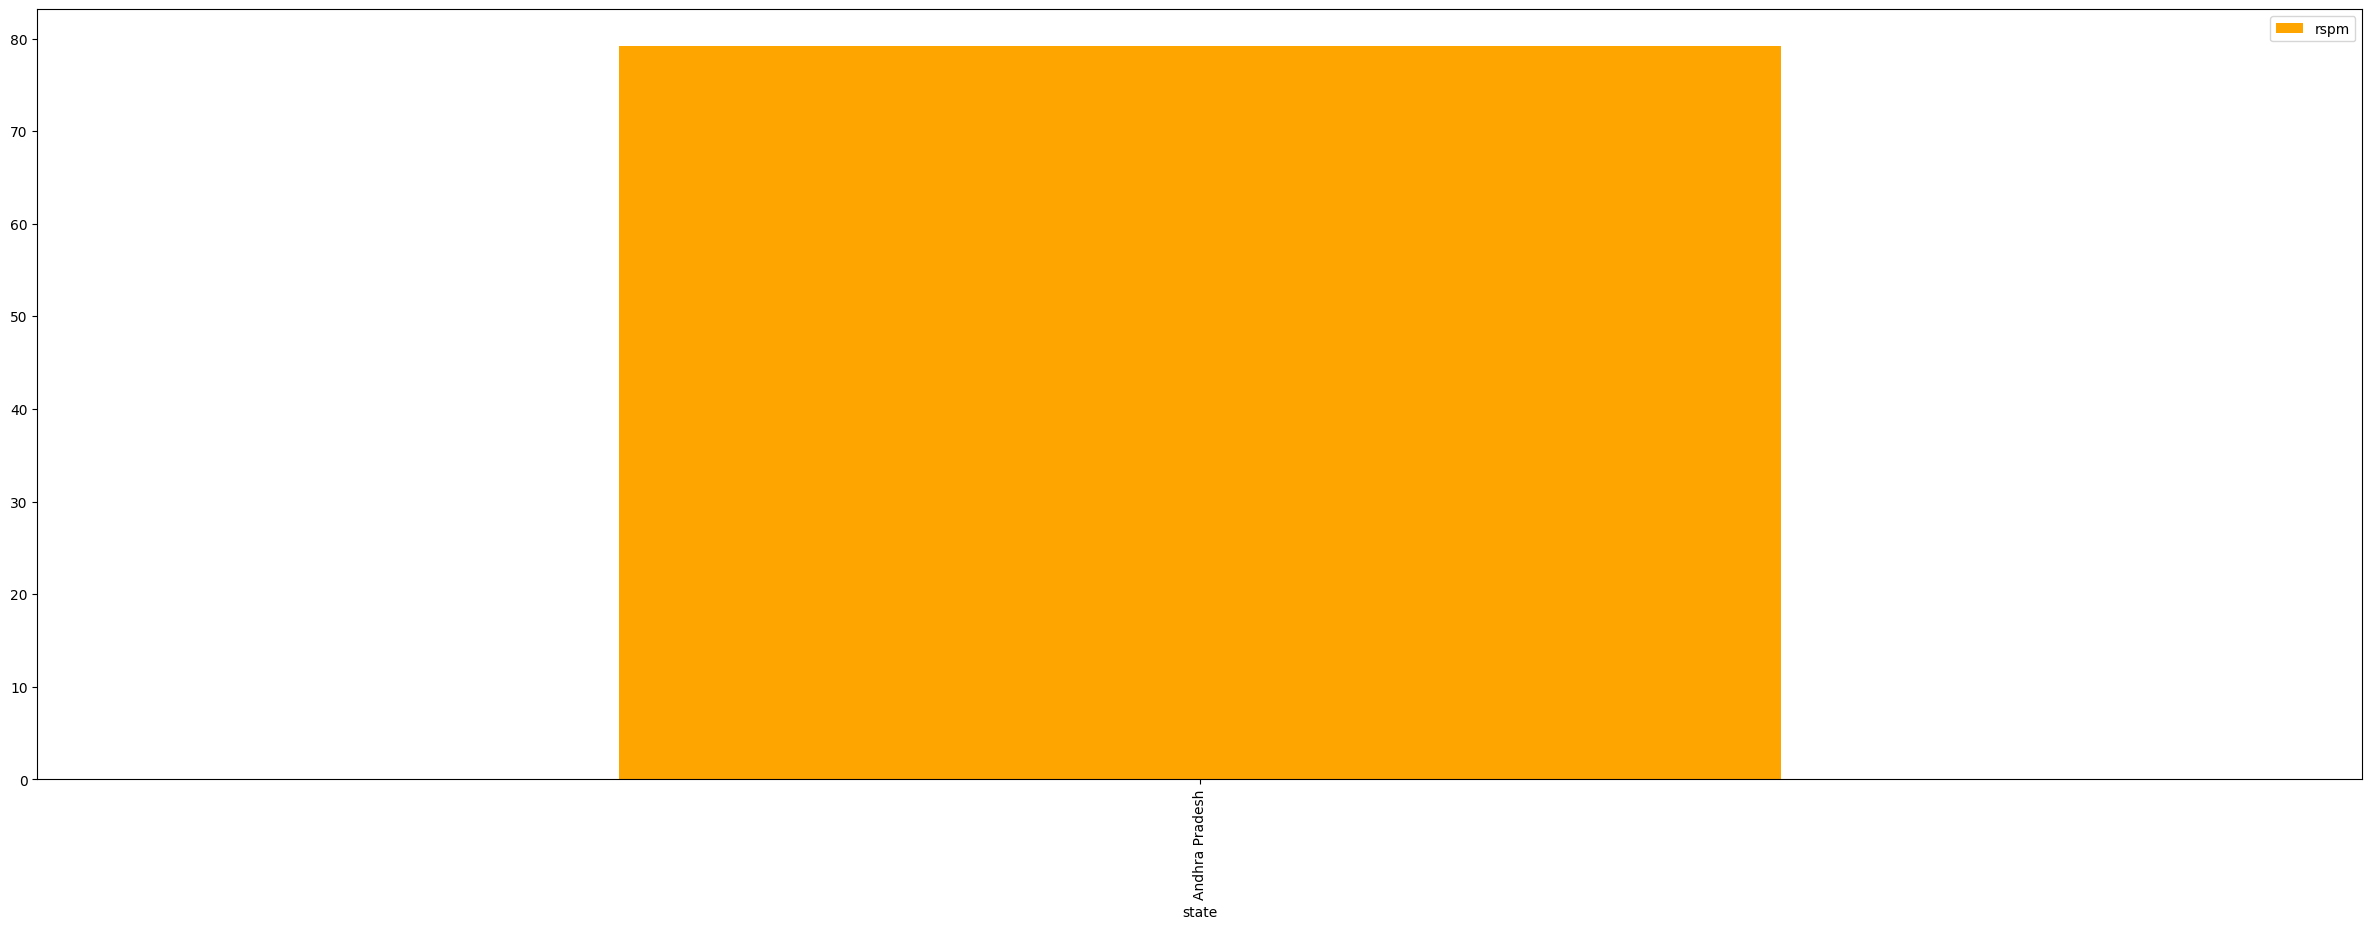

In [29]:
df[['rspm','state']].groupby(['state']).mean().sort_values(by='rspm').plot.bar(color='orange')
plt.show()

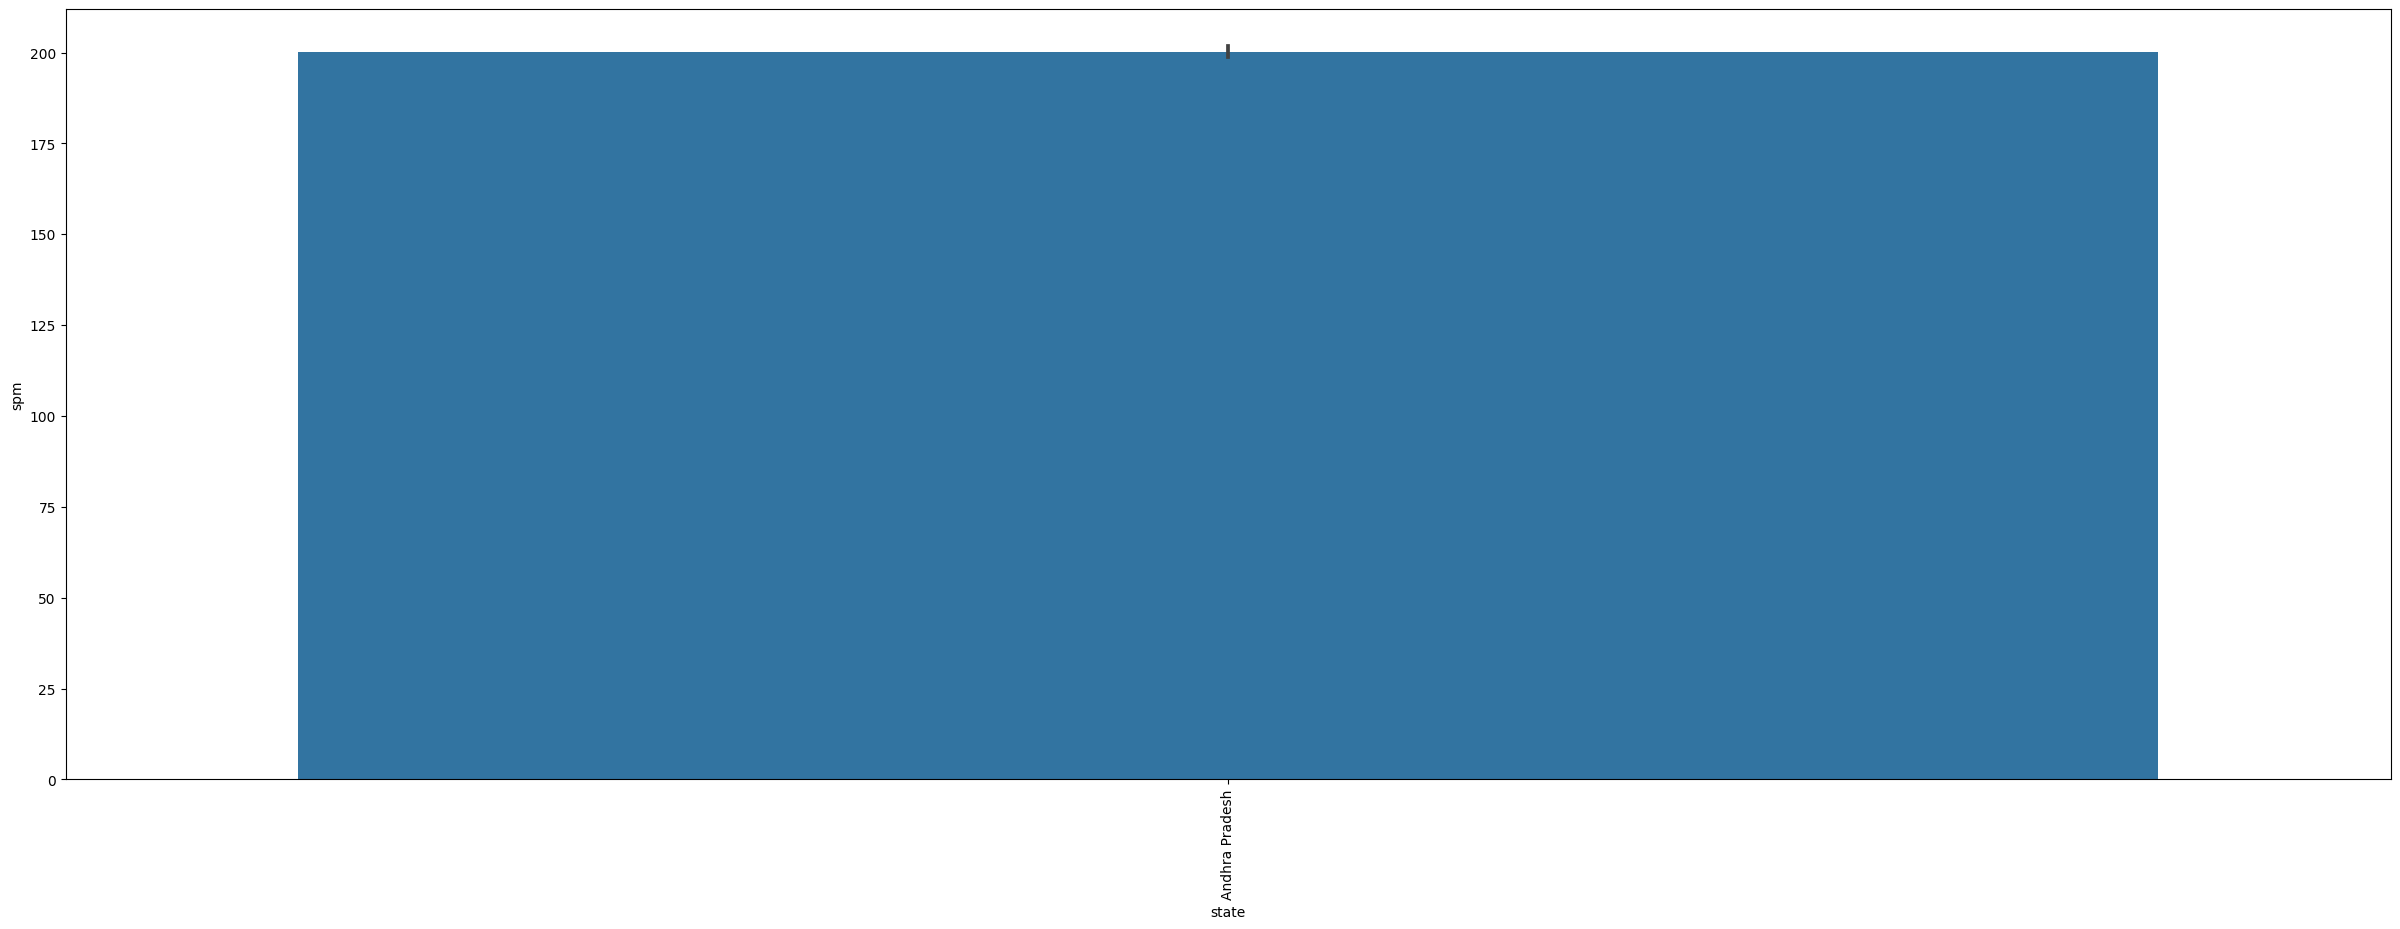

In [30]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);

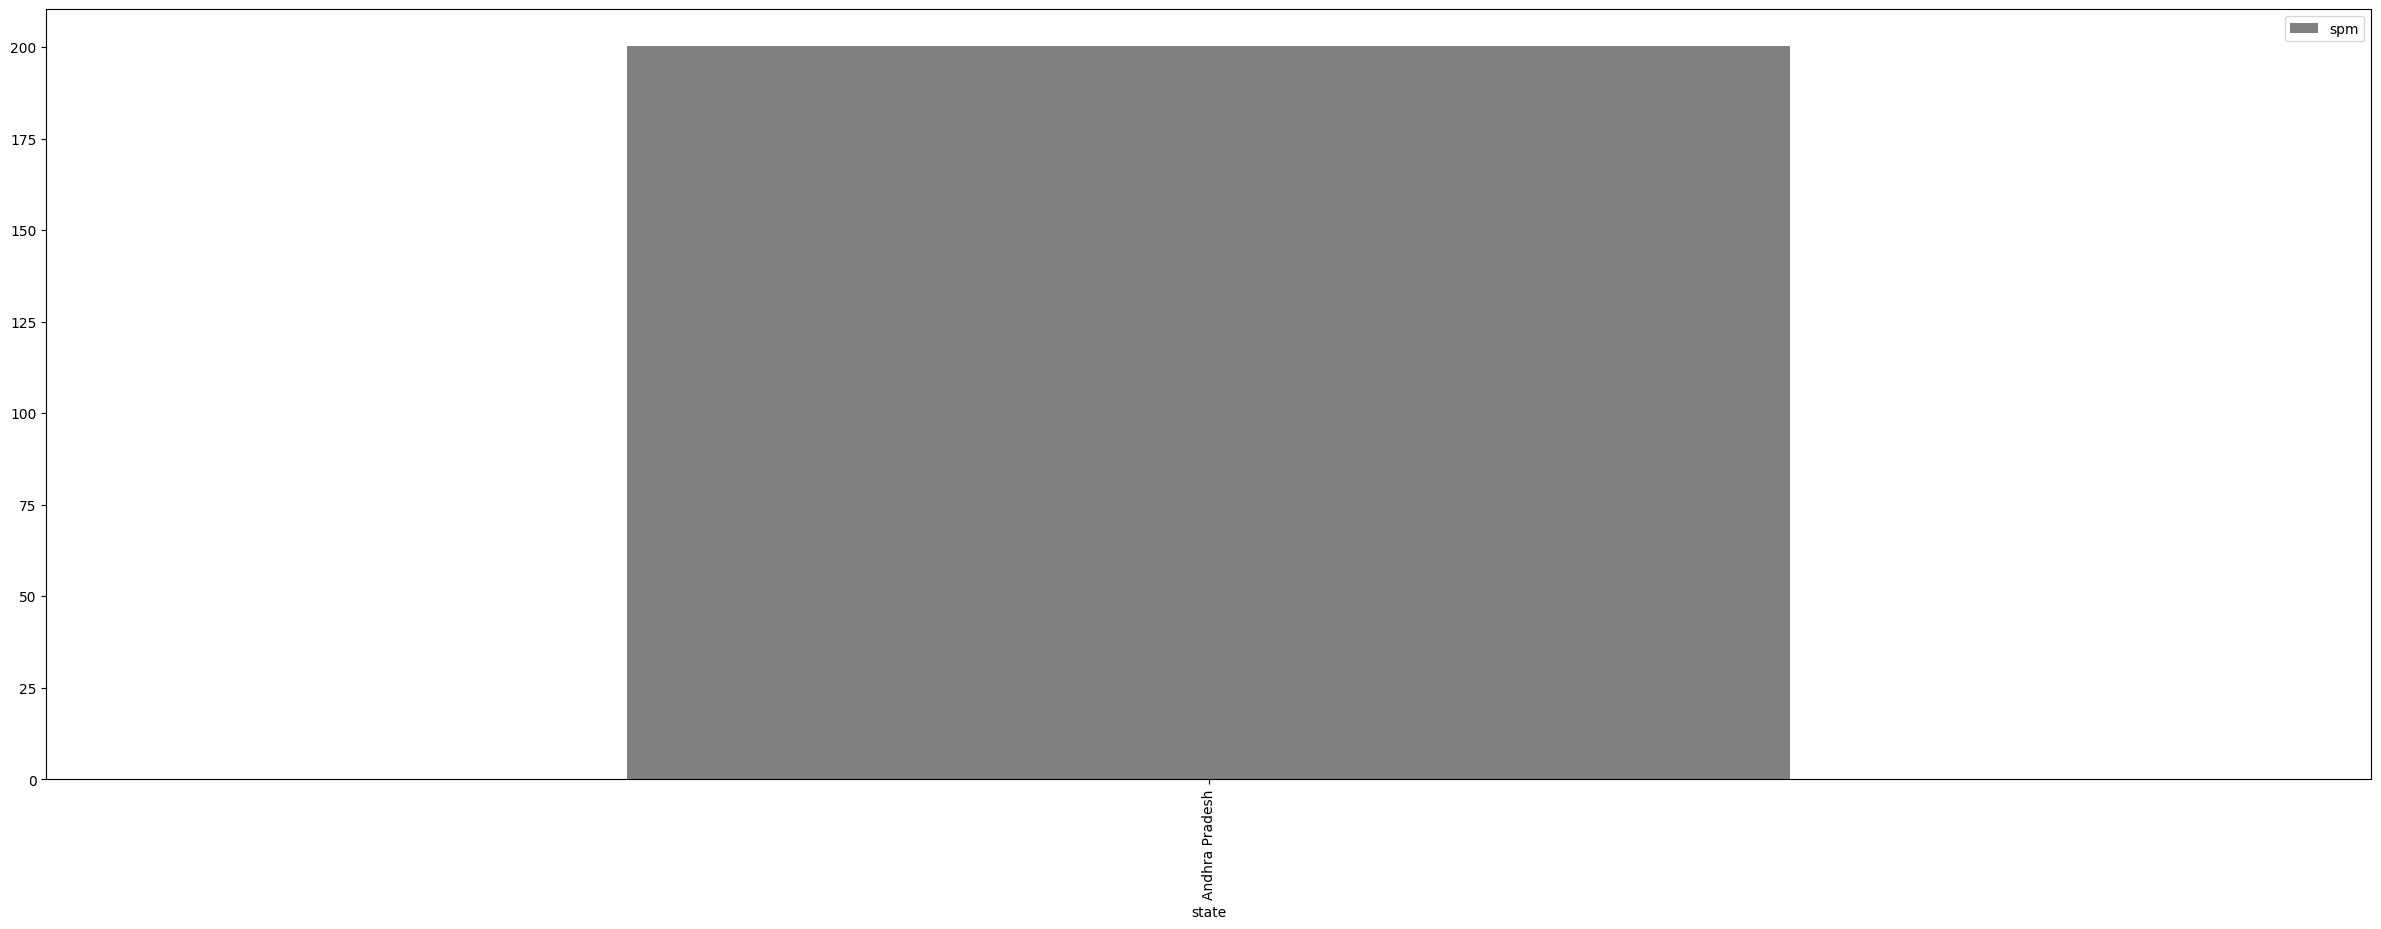

In [31]:
df[['spm','state']].groupby(['state']).mean().sort_values(by='spm').plot.bar(color='grey')
plt.show()

We can see Delhi has highest level of spm in air

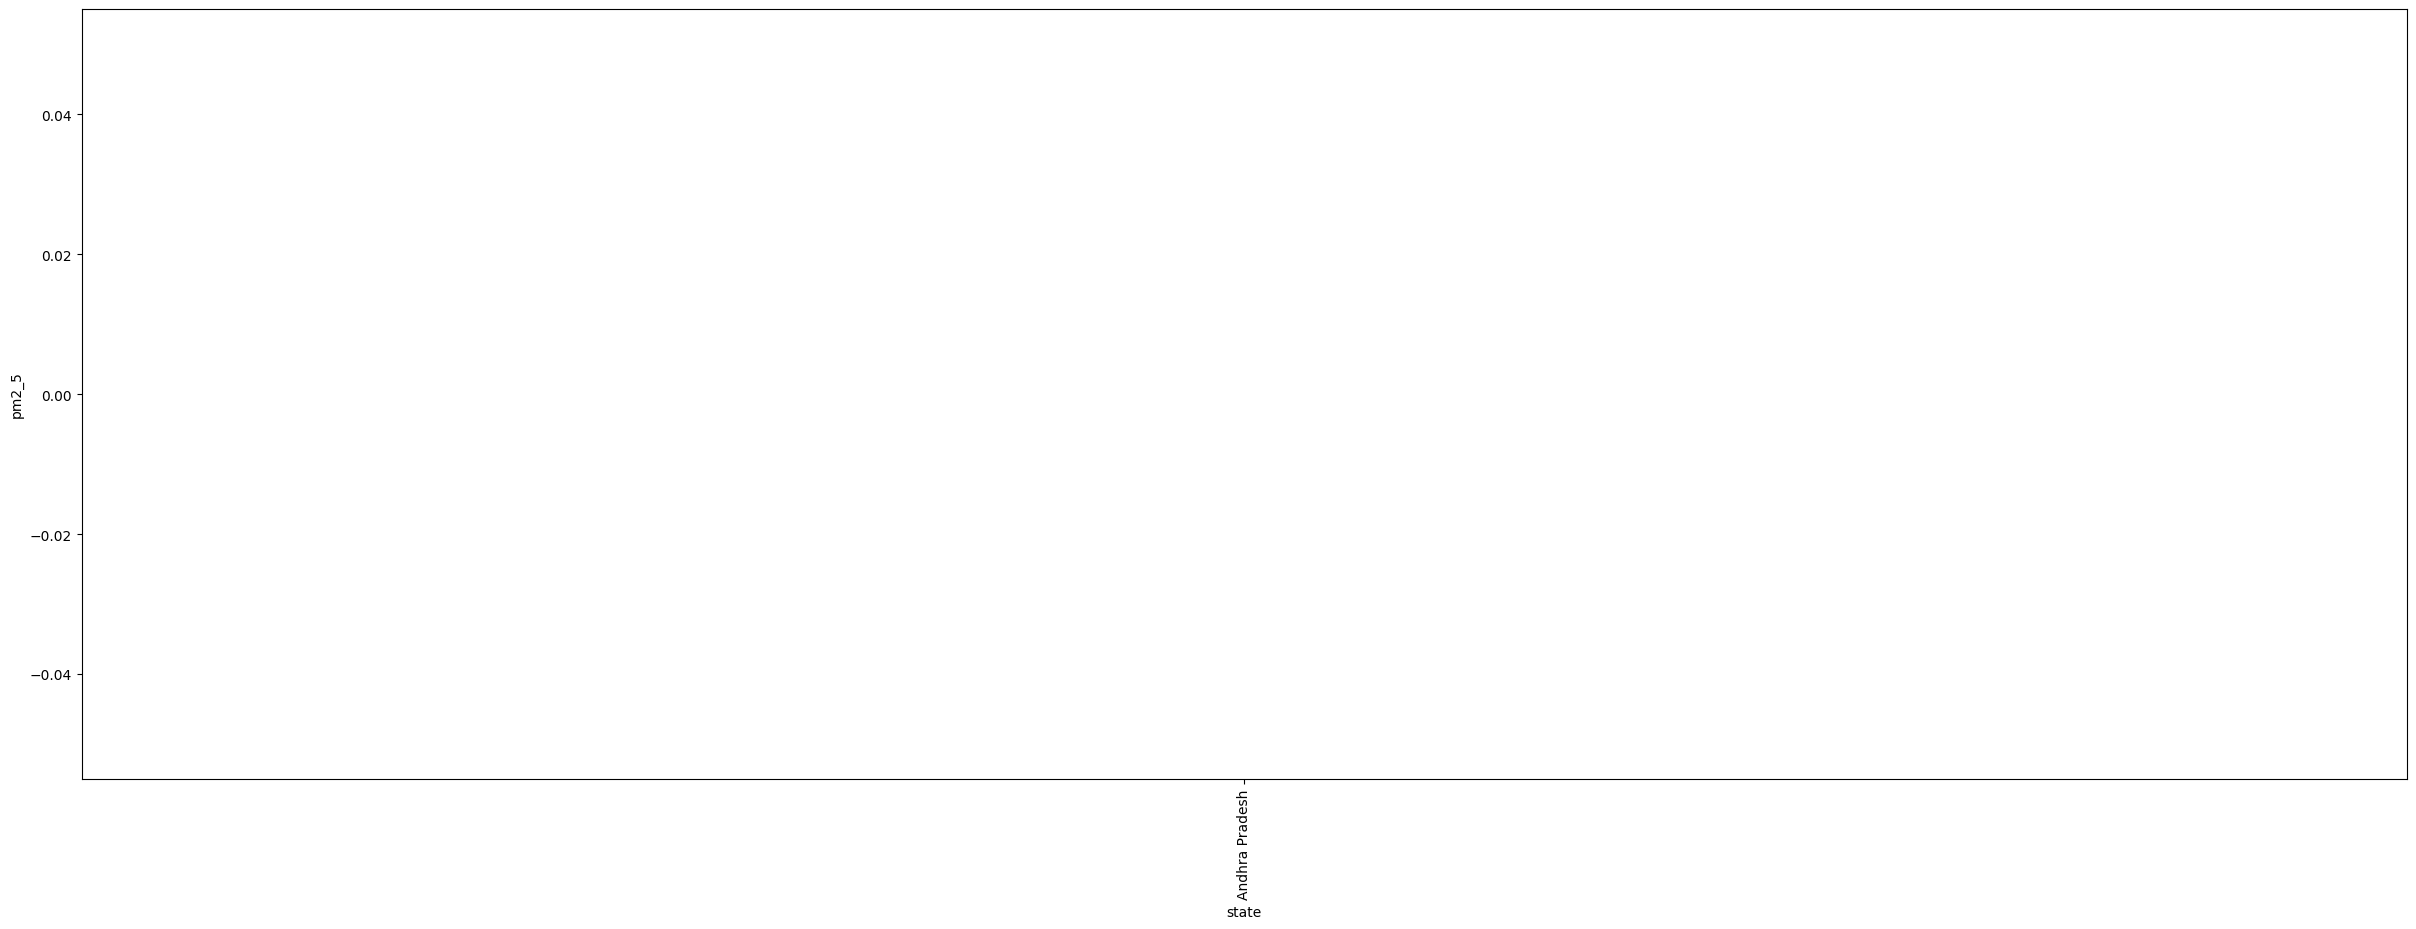

In [32]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);

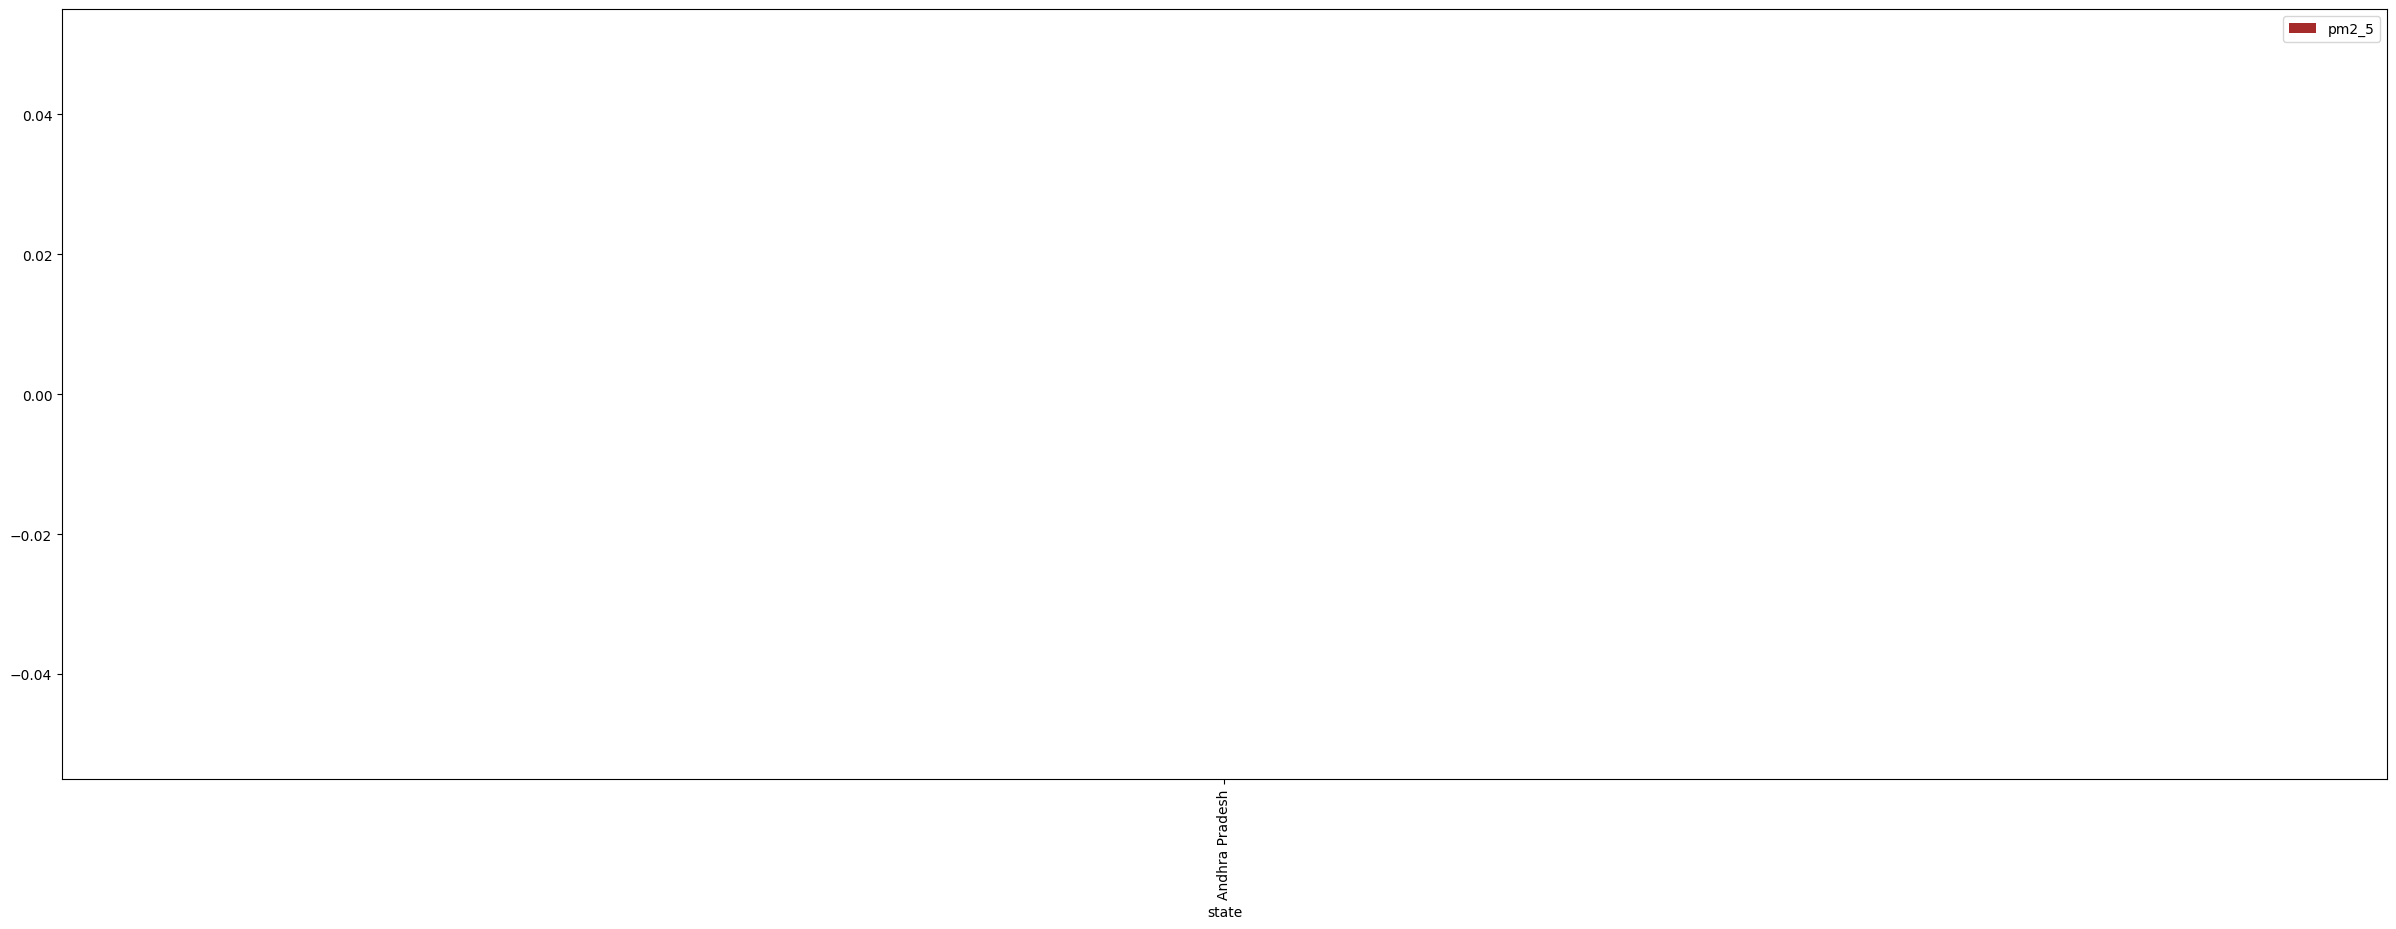

In [33]:
df[['pm2_5','state']].groupby(['state']).mean().sort_values(by='pm2_5').plot.bar(color='brown')
plt.show()

So Delhi has highest level of pm2_5

# Checking all null values in data

In [34]:
nullvalues=df.isnull().sum().sort_values(ascending=False)

In [35]:
nullvalues

pm2_5                          21513
spm                             9724
agency                          9498
stn_code                        9072
rspm                            1141
location_monitoring_station     1037
type                             611
so2                              537
no2                              401
date                               1
sampling_date                      0
state                              0
location                           0
dtype: int64

In [36]:
null_value_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns non-NAN values)

In [37]:
null_value_percentage

pm2_5                          100.000000
spm                             45.200576
agency                          44.150049
stn_code                        42.169851
rspm                             5.303770
location_monitoring_station      4.820341
type                             2.840143
so2                              2.496165
no2                              1.863989
date                             0.004648
sampling_date                    0.000000
state                            0.000000
location                         0.000000
dtype: float64

In [38]:
missing_data_percentage=pd.concat([nullvalues,null_value_percentage],axis=1,keys=['Total','Percent'])

Concatenated total null values and its percentage of missing values for furthur imputation or column detection

In [39]:
missing_data_percentage

,Total,Percent
pm2_5,21513,100.000000
spm,9724,45.200576
agency,9498,44.150049
stn_code,9072,42.169851
rspm,1141,5.303770
location_monitoring_station,1037,4.820341
type,611,2.840143
so2,537,2.496165
no2,401,1.863989
date,1,0.004648


In [40]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

Here we have dropped some columns which had around half of null values and those which were not that important

In [41]:
df.isnull().sum()
#now checking the null values

state           0
location        0
type          611
so2           537
no2           401
rspm         1141
spm          9724
pm2_5       21513
dtype: int64

In [42]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN


In [43]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
#imputation of null values for categorical data

In [44]:
df.fillna(0,inplace=True)
#replaced null values with 0 in numerical data

In [45]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [46]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
21508,Andhra Pradesh,Ananthapur,"Residential, Rural and other Areas",4.0,15.0,48.0,0.0,0.0
21509,Andhra Pradesh,Ananthapur,"Residential, Rural and other Areas",4.0,15.0,62.0,0.0,0.0
21510,Andhra Pradesh,Ananthapur,"Residential, Rural and other Areas",4.0,15.0,57.0,0.0,0.0
21511,Andhra Pradesh,Ananthapur,"Residential, Rural and other Areas",4.0,16.0,62.0,0.0,0.0


Now we can see there are no null values in data

# CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA

In [47]:
def cal_SOi(so2):
  si=0
  if so2<=40:
    si=so2*(50/40)
  elif (so2>40 and so2<=80):
    si=50+(so2-40)*(50/40)
  elif (so2>80 and so2<=380):
    si=100+(so2-80)*(100/300)
  elif (so2>380 and so2<=800):
    si=200+(so2-380)*(100/420)
  elif (so2>800 and so2<=1600):
    si=300+(so2-800)*(100/800)
  elif(so2>1600):
    si=400+(so2-1600)*(100/800)
  return si
df['SOi']=df['so2'].apply(cal_SOi)
data=df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


# CALCULATE AIR QUALITY INDEX FOR NO2 BASED ON FORMULA

In [48]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


### Function to calculate rspm individual pollutant index(rpi)


In [49]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### Function to calculate spm individual pollutant index(spi)

In [50]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
21508,0.0,0.0
21509,0.0,0.0
21510,0.0,0.0
21511,0.0,0.0


### function to calculate the air quality index (AQI) of every data value

In [51]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [52]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [53]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

Good              9569
Poor              7728
Unhealthy         2391
Moderate          1214
Very unhealthy     494
Hazardous          117
Name: AQI_Range, dtype: int64

Splitting datasets into dependent and independent columns

In [54]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [55]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(17210, 4) (4303, 4) (17210,) (4303,)


In [57]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [58]:
#predicting train
train_pred=model.predict(X_train)
#predicting test
test_pred=model.predict(X_test)

In [59]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData=",str(RMSE_train))
print("RMSE TestData=",str(RMSE_test))
print("_"*50)
print('RSquared value on train:',model.score(X_train,Y_train))
print('RSquared value on test:',model.score(X_test,Y_test))

RMSE TrainingData= 8.471301234133257
RMSE TestData= 8.693070764997394
__________________________________________________
RSquared value on train: 0.9912502073532862
RSquared value on test: 0.9910676832328311


##Decision Tree

In [60]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [61]:
#predicting train data
train_preds=DT.predict(X_train)
#predicting test data
test_preds=DT.predict(X_test)

In [62]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData:",str(RMSE_train))
print("RMSE TestData:",str(RMSE_test))
print("_"*50)
print('RSquared value on train:',DT.score(X_train,Y_train))
print('RSquared value on test:',DT.score(X_test,Y_test))

RMSE TrainingData: 2.9293122876993506e-14
RMSE TestData: 2.8597277713457774
__________________________________________________
RSquared value on train: 1.0
RSquared value on test: 0.9990333548595991


##Random Forest Regressor

In [63]:
RF=RandomForestRegressor()

In [64]:
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [65]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting test
test_preds1=RF.predict(X_test)

In [66]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE Training data=",str(RMSE_train))
print("RMSE test data=",str(RMSE_test))
print("_"*50)
print("RSquared value on train:",RF.score(X_train,Y_train))
print("RSquared value on test:",RF.score(X_test,Y_test))

RMSE Training data= 0.5858593870179347
RMSE test data= 2.587444829506389
__________________________________________________
RSquared value on train: 0.9999581510759694
RSquared value on test: 0.9992086658959392


#classification Algorithms

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [69]:
X2=df[['SOi','Noi','Rpi','SPMi']]
Y2=df['AQI_Range']
#Splitting the data into independent and dependent columns for classification

In [70]:
X_train2,X_test2,Y_train2,Y_test2= train_test_split(X2,Y2,test_size=0.3,random_state=70)
#Splitting data into training and testing data

##Logistic Regression

In [71]:
#fitting the model on train data
LogR=LogisticRegression().fit(X_train2,Y_train2)

In [72]:
#predict on train
train_preds2=LogR.predict(X_train2)
#accuracy on train
print("model accuracy on train is : ",accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2=LogR.predict(X_test2)
#accuracy on test
print("Model accracy on test is:",accuracy_score(Y_test2,test_preds2))
print("_"*50)

#kappa score
print('KappaScore is:',metrics.cohen_kappa_score(Y_test2,test_preds2))

model accuracy on train is :  0.8298691812205325
Model accracy on test is: 0.8289432909823365
__________________________________________________
KappaScore is: 0.730569028901523


In [74]:
LogR.predict([[727,327.55,78.2,100]])

array(['Good'], dtype=object)

In [75]:
LogR.predict([[2.7,45,35.16,23]])

array(['Good'], dtype=object)

In [76]:
LogR.predict([[10,2.8,82,20]])

array(['Poor'], dtype=object)

In [77]:
LogR.predict([[500,32.6,78,34.67]])

array(['Good'], dtype=object)

##decision tree classifier

In [78]:
#fit the model in train data
DT2= DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3=DT2.predict(X_train2)
#accuracy on train
print("model accuracy on train is : ",accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3=DT2.predict(X_test2)
#accuracy on test
print("model accuracy on test is : ",accuracy_score(Y_test2, test_preds3))
print("_"*50)

#kappa score
print('Kappa score is:',metrics.cohen_kappa_score(Y_test2,test_preds3))

model accuracy on train is :  1.0
model accuracy on test is :  0.9998450573287884
__________________________________________________
Kappa score is: 0.999765627181698


##Random forest classifier

In [79]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9990703439727301
--------------------------------------------------
KappaScore is:  0.9985937380160507


##K Nearest neighbor classifier

In [80]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9968125373530778
Model accuracy on test is:  0.9953517198636505
--------------------------------------------------
KappaScore is:  0.9929644493575164


In [81]:
KNN.predict([[7.4,47.7,78.182,100]])
# Predictions on random values

array(['Poor'], dtype=object)

In [82]:
KNN.predict([[1,1.2,3.12,0]])
# Predictions on random values

array(['Good'], dtype=object)

In [83]:
KNN.predict([[3,2,9.12,10]])

array(['Good'], dtype=object)

So we can see KNNclassifier is predicting accurately